<a href="https://colab.research.google.com/github/Farmhouse121/Financial-Data-Science-in-Python/blob/main/Miscellaneous/Direction_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from my_library import *

12:22:01 Starting...
12:22:01 Installing yfinance into Google notebook...
12:22:10 Installing arch into Google notebook...


/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


12:22:22 Initialized.


In [2]:
from requests import get
from io import StringIO
ds=pd.read_csv(StringIO("\n".join(get("https://s3.amazonaws.com/public.gillerinvestments.com/direction.csv").text.split("\n")[2:])))\
    .rename(columns={"Unnamed: 0":"Ticker"}).set_index('Ticker')
ds["Significance"]=ds["Significance"].apply(lambda x:'' if isinstance(x,float) else x)
nprint("Loaded direction statistics data.")
display(ds)

12:22:22 Loaded direction statistics data.


,Up,Down,Sample,Up:Down Ratio,Loss Percent,Loss Days,Z Score,p Value,Significance
Ticker,,,,,,,,,
Total,148,106,255,1.396226,41.568627,2.078431,2.635314,0.008406,**
UUP,71,50,236,1.420000,21.186441,1.059322,1.909091,0.056250,
QQQ,140,114,254,1.228070,44.881890,2.244094,1.631385,0.102809,
TBX,36,24,191,1.500000,12.565445,0.628272,1.549193,0.121335,
TQQQ,116,95,254,1.221053,37.401575,1.870079,1.445700,0.148261,
SH,1,4,254,0.250000,1.574803,0.078740,-1.341641,0.179712,
DIA,136,115,254,1.182609,45.275591,2.263780,1.325508,0.185003,
TBT,27,19,254,1.421053,7.480315,0.374016,1.179536,0.238185,
DOG,1,0,254,inf,0.000000,0.000000,1.000000,0.317311,


In [18]:
from scipy.stats import norm
SPX=download('^GSPC','2023-01-26')
SPX['Daily Return']=SPX['Adj Close']/SPX['Adj Close'].shift()*hundred-hundred
SPX['Up']=SPX['Daily Return'].apply(lambda x:one if x>zero else zero if x<=zero else np.nan)
SPX['Down']=SPX['Daily Return'].apply(lambda x:one if x<zero else zero if x>=zero else np.nan)
display(SPX)
ds.loc['Market','Up']=SPX['Up'].sum()
ds.loc['Market','Down']=SPX['Down'].sum()
ds.loc['Market','Sample']=SPX['Daily Return'].count()
ds.loc['Market','Up:Down Ratio']=ds.loc['Market','Up']/ds.loc['Market','Down']
ds.loc['Market','Loss Percent']=ds.loc['Market','Down']/ds.loc['Market','Sample']*hundred
ds.loc['Market','Loss Days']=ds.loc['Market','Loss Percent']*five/hundred
ds.loc['Market','Z Score']=(ds.loc['Market','Up']-ds.loc['Market','Down'])/np.sqrt(ds.loc['Market','Up']+ds.loc['Market','Down'])
ds.loc['Market','p Value']=norm.sf(ds.loc['Market','Z Score'])
ds.loc['Market','Significance']='***' if ds.loc['Market','p Value']<0.001 else '**' if ds.loc['Market','p Value']<0.01 else '*' if ds.loc['Market','p Value']<0.05 else ''
display(ds)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Daily Return,Up,Down
Date,,,,,,,,,
2023-01-26,4036.080078,4061.570068,4013.290039,4060.429932,4060.429932,3809590000,NaN,NaN,NaN
2023-01-27,4053.719971,4094.209961,4048.699951,4070.560059,4070.560059,3907760000,0.249484,1.0,0.0
2023-01-30,4049.270020,4063.850098,4015.550049,4017.770020,4017.770020,3802000000,-1.296874,0.0,1.0
2023-01-31,4020.850098,4077.159912,4020.439941,4076.600098,4076.600098,4679320000,1.464247,1.0,0.0
2023-02-01,4070.070068,4148.950195,4037.199951,4119.209961,4119.209961,4856930000,1.045230,1.0,0.0
...,...,...,...,...,...,...,...,...,...
2024-01-25,4886.660156,4898.149902,4869.339844,4894.160156,4894.160156,4020430000,0.526037,1.0,0.0
2024-01-26,4888.910156,4906.689941,4881.470215,4890.970215,4890.970215,3353400000,-0.065179,0.0,1.0
2024-01-29,4892.950195,4929.310059,4887.399902,4927.930176,4927.930176,3525160000,0.755677,1.0,0.0


,Up,Down,Sample,Up:Down Ratio,Loss Percent,Loss Days,Z Score,p Value,Significance
Ticker,,,,,,,,,
Total,148.0,106.0,255.0,1.396226,41.568627,2.078431,2.635314,0.008406,**
UUP,71.0,50.0,236.0,1.420000,21.186441,1.059322,1.909091,0.056250,
QQQ,140.0,114.0,254.0,1.228070,44.881890,2.244094,1.631385,0.102809,
TBX,36.0,24.0,191.0,1.500000,12.565445,0.628272,1.549193,0.121335,
TQQQ,116.0,95.0,254.0,1.221053,37.401575,1.870079,1.445700,0.148261,
SH,1.0,4.0,254.0,0.250000,1.574803,0.078740,-1.341641,0.179712,
DIA,136.0,115.0,254.0,1.182609,45.275591,2.263780,1.325508,0.185003,
TBT,27.0,19.0,254.0,1.421053,7.480315,0.374016,1.179536,0.238185,
DOG,1.0,0.0,254.0,inf,0.000000,0.000000,1.000000,0.317311,


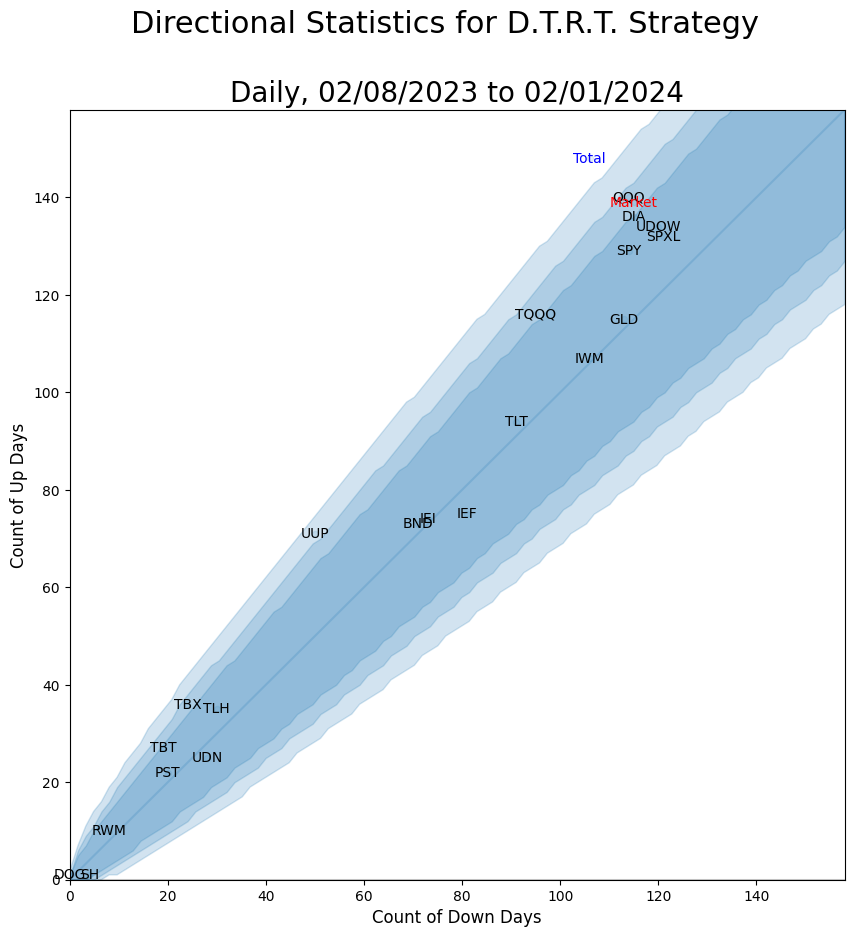

In [21]:
from scipy.stats import poisson
from datetime import timedelta

figure,plot=pl.subplots(figsize=(ten,ten))
ds.plot.scatter("Down","Up",ax=plot,alpha=0.1)

for ticker in [t for t in ds.index if t not in ('Total','Market')]:
    plot.text(ds.loc[ticker,"Down"],ds.loc[ticker,"Up"],ticker,ha='center',va='center',color='black')

plot.text(ds.loc["Total","Down"],ds.loc["Total","Up"],"Total",ha='center',va='center',color='blue')
plot.text(ds.loc["Market","Down"],ds.loc["Market","Up"],"Market",ha='center',va='center',color='red')

mn,mx=ds[["Up","Down"]].min().min(),ds[["Up","Down"]].max().max()
x=np.linspace(mn+one/ten,mx+10,100)
plot.plot(x,x,'-',alpha=0.2,color='C0',label='No Directional Bias')
plot.axhline(color='black',alpha=0.2)
plot.axvline(color='black',alpha=0.2)
plot.set_xlim(zero,x[-1])
plot.set_ylim(zero,x[-1])
plot.set_xlabel("Count of %s Days" % plot.get_xlabel(),fontsize=12)
plot.set_ylabel("Count of %s Days" % plot.get_ylabel(),fontsize=12)
title="Directional Statistics for D.T.R.T. Strategy"
figure.suptitle(title,fontsize=22)
plot.set_title("Daily, %s to %s" % ((datetime.now()-timedelta(7e0/5e0*float(ds['Sample'].max()+1))).strftime(DATE_FORMAT),
    datetime.now().strftime(DATE_FORMAT)),fontsize=20)

for pvalue in 0.05,0.01,0.001:
    yp,ym=poisson.ppf(pvalue/two,x),poisson.ppf(one-pvalue/two,x)
    plot.fill_between(x,ym,yp,color='C0',alpha=0.2,label="%g %% C.R." % (hundred-pvalue*hundred))